In [1]:
import os
import sys
import numpy as np
print(np.version.version)
#Set the directory that contains the ROOT data
# os.environ['ARTTFSDIR'] = "~/Desktop/tempdatadir"
os.environ['ARTTFSDIR'] = "/Volumes/DataStorage/gm2/FieldData/mnt/nfs/g2field-server-2/newg2/DataProduction/Nearline/ArtTFSDir"


print("data dir = ",os.environ['ARTTFSDIR'])

1.16.2
data dir =  /Volumes/DataStorage/gm2/FieldData/mnt/nfs/g2field-server-2/newg2/DataProduction/Nearline/ArtTFSDir


In [2]:
#add the gm2 pyroot tool to the path (within the shell)
# sys.path.append('/Users/bono/Desktop/PythonTool/gm2/lib')
# sys.path.append('/Users/bono/Desktop/PythonTool/newest/gm2/lib')
sys.path.append('/Users/bono/Desktop/PythonTool/gm2/lib')


In [3]:
#Bypass using the thisgm2.sh file

#Set BASEDIR and GM2
# base_dir = "/Users/bono/Desktop/PythonTool/gm2"
# base_dir = "/Users/bono/Desktop/PythonTool/newest/gm2"
base_dir = "/Users/bono/Desktop/PythonTool/gm2"

os.environ['BASEDIR'] = base_dir
os.environ['GM2'] = base_dir
print("GM2 = ",os.environ['GM2'])

#append PYTHONPATH
python_path = os.environ['PYTHONPATH'] + ":" + base_dir + "/lib"
os.environ['PYTHONPATH'] = python_path
print("PYTHONPATH = ",os.environ['PYTHONPATH'])

GM2 =  /Users/bono/Desktop/PythonTool/gm2
PYTHONPATH =  /usr/local/Cellar/root/6.16.00/lib/root:/Users/bono/Desktop/PythonTool/gm2/lib


In [4]:
#load the library
import gm2
import matplotlib.pyplot as plt

Welcome to JupyROOT 6.16/00



loop done: 100%                                    


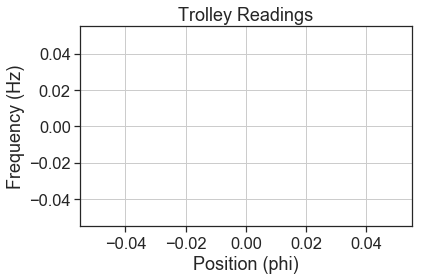

Error in <TFile::TFile>: file /Volumes/DataStorage/gm2/FieldData/mnt/nfs/g2field-server-2/newg2/DataProduction/Nearline/ArtTFSDir/FieldGraphOut03956_tier1.root does not exist


In [5]:
# tr = gm2.Trolley([6327],"FieldPlainRootOutput_")
# tr = gm2.Trolley([6327])
tr = gm2.Trolley([3956])
tr_time, tr_pos, tr_freq = tr.getBasics() # return numpy arrays with size [n_events, n_probes]
probe = 4
plt.plot(tr_pos[:,probe], tr_freq[:,probe], 'o-', lw=2,alpha=0.5)
# plt.xlim(20000,80000)
plt.title('Trolley Readings')
plt.xlabel('Position (phi)')
plt.ylabel('Frequency (Hz)')
plt.grid()
plt.tight_layout()
plt.show()


3212


/usr/local/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


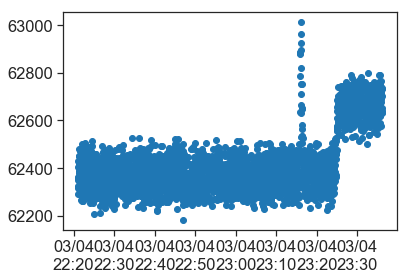

In [6]:
freq_method = 0
evt = 5
run = 6327
fp = gm2.FixedProbe([run])
n_evts = fp.getEntries()
print(n_evts)
def callback():
     return [fp.getFrequency(freq_method)[probe], fp.getTimeGPS()[probe]]

fp_freq = np.empty(0)
fp_time = np.empty(0)
for evt in range(n_evts):
    fp.load(evt)
    a,b = callback()
    fp_freq = np.append(fp_freq, a)
    fp_time = np.append(fp_time, b)
# plt.plot(fp_time, fp_freq, 'o-', lw=2,alpha=0.5)
# plt.title('Fixed Probe {} Readings'.format(probe))
# plt.xlabel('Time (ns)')
# plt.ylabel('Frequency (Hz)')
# plt.grid()
# plt.tight_layout()
# plt.show()

gm2.plotutil.plot_ts(fp_time, fp_freq)

In [7]:
fp_freq, fp_time = fp.loop(callback)

Reading event 3210/3212 99.94%                 
loop done: 100%                                    


In [8]:
fp_time, fp_freq = fp.getBasics()

Reading event 3210/3212 99.94% 
loop done: 100%                                    
